# SETUP
- - -

In [3]:
!ls -tral /Users/quartz/data/wine-reviews/

total 355432
-rwxr-xr-x@  1 quartz  staff  52908706 11 27  2017 winemag-data-130k-v2.csv
-rwxr-xr-x@  1 quartz  staff  79279294 11 27  2017 winemag-data-130k-v2.json
-rwxr-xr-x@  1 quartz  staff  49784334 11 27  2017 winemag-data_first150k.csv
drwx------@  5 quartz  staff       160 12 11 14:55 .
drwxr-xr-x  16 quartz  staff       512 12 11 14:56 ..


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
file_1 = '/Users/quartz/data/wine-reviews/winemag-data_first150k.csv'
# file_2 = '/Users/quartz/data/wine-reviews/winemag-data-130k-v2.csv'

In [60]:
data_raw = pd.read_csv(file_1)
data_raw = data_raw.drop('Unnamed: 0', axis=1)
data_raw.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [5]:
columns = data_raw.columns
columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [63]:
def rank_estimator(score):
    
    if (85 >= score >= 80):
        return "B"
    elif (90 >= score > 85):
        return "A"
    elif (95 >= score > 90):
        return "S"
    else:
        return "SS"

data_revise = data_raw.copy()
data_revise.points = data_revise.points.apply(rank_estimator)
data_revise.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,SS,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,SS,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,SS,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,SS,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,S,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# EDA
- - -

### data description

- country : The country that the wine is from
- description : A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- designation : The vineyard within the winery where the grapes that made the wine are from
- points : The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- price : The cost for a bottle of the wine
- province : The province or state that the wine is from
- region_1 : The wine growing area in a province or state (ie Napa)
- region_2 : Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- variety : The type of grapes used to make the wine (ie Pinot Noir)
- winery : The winery that made the wine

reference : [kaggle Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews#winemag-data_first150k.csv)

In [11]:
# 빈도수 확인

for column in columns:
    frequent = data_raw[column].value_counts().iloc[:10]
    print(frequent)

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64
Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.                                                                                                                                      6
A little bit funky and unsettled when you pop the screwcap, but soon it finds its floral, blueberry base. Remains superficial and sweet in the mouth, with candied flavors, vanilla and mild oak. Highly regular; could use more concentration and density.                                                                                                             6
86-88 This could work as a rich wine, 

In [12]:
# 결측치 확인

data_raw.isna().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [13]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [14]:
data_raw.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


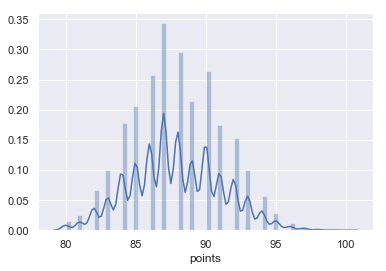

In [15]:
# feature "points" distribution

points = data_raw.points

sns.distplot(points)

In [26]:
data_raw.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [27]:
data_raw.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [53]:
# country, price, variety, winery

# Simple Modeling
- - -

### find relation between feature "description" and feature "points"

In [16]:
# make dataset, corpus

In [17]:
data_test = data_raw[['description', 'points']]
data_test.tail()

,description,points
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers an intriguing nose with ginger, lime an...",91
150927,This classic example comes from a cru vineyard...,91
150928,"A perfect salmon shade, with scents of peaches...",90
150929,More Pinot Grigios should taste like this. A r...,90


In [18]:
data_test.description = data_test.description.apply(lambda x : x.lower())
data_test.description[0]

'this tremendous 100% varietal wine hails from oakville and was aged over three years in oak. juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. enjoy 2022–2030.'

In [19]:
def rank_estimator(score):
    
    if (85 >= score >= 80):
        return "B"
    elif (90 >= score > 85):
        return "A"
    elif (95 >= score > 90):
        return "S"
    else:
        return "SS"

data_test.points = data_test.points.apply(rank_estimator)
data_test.head()

,description,points
0,this tremendous 100% varietal wine hails from ...,SS
1,"ripe aromas of fig, blackberry and cassis are ...",SS
2,mac watson honors the memory of a wine once ma...,SS
3,"this spent 20 months in 30% new french oak, an...",SS
4,"this is the top wine from la bégude, named aft...",S


In [20]:
corpus = data_test.description.values
corpus = list(corpus)
corpus[:5]

['this tremendous 100% varietal wine hails from oakville and was aged over three years in oak. juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. enjoy 2022–2030.',
 'ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. this is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. a toasty, everlasting finish is heady but ideally balanced. drink through 2023.',
 'mac watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/l of residual sugar.',
 "this spent 20 months in 30% ne

In [37]:
# tokenizer

from nltk.tokenize import word_tokenize

In [40]:
# vectorizer (count_vect)

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=2, 
                             stop_words='english', 
                             tokenizer=word_tokenize)
X_sparse = count_vect.fit_transform(corpus)
X_sparse

<150930x23429 sparse matrix of type '<class 'numpy.int64'>'
	with 3792215 stored elements in Compressed Sparse Row format>

```
stop_words='english'

<150930x30452 sparse matrix of type '<class 'numpy.int64'>'
	with 3474095 stored elements in Compressed Sparse Row format>

```

In [31]:
# vectorizer (tf-idf)

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(stop_words='english')
X_sparse = tf_vect.fit_transform(corpus)
X_sparse

<150930x30452 sparse matrix of type '<class 'numpy.float64'>'
	with 3474095 stored elements in Compressed Sparse Row format>

In [42]:
# modeling

from sklearn.naive_bayes import MultinomialNB
Mult = MultinomialNB()

y = data_test.points.values
X = X_sparse

In [33]:
# cross validation

from sklearn.model_selection import cross_val_score

model_mult = Mult.fit(X, y)

y_pred = model_mult.predict(X)
result = np.mean(y_pred == y)
result # 0.7309679984098588

score = cross_val_score(Mult, X, y, scoring='accuracy', cv=5)
score

array([0.66170868, 0.68131977, 0.69373219, 0.71081663, 0.6974325 ])

In [24]:
# change model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

Gaus = GaussianNB()
Bern = BernoulliNB()
Mult = MultinomialNB()

In [25]:
# modeling with cross validation

models = [Bern, Mult]

y = data_test.points.values
X = X_sparse
# X = X_sparse.todense()

for model in models:
    
    score = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    
    print("{} model score is {}".format(model, score))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) model score is [0.69510054 0.7177593  0.7284834  0.74185854 0.73046215]
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) model score is [0.67403187 0.70291847 0.70893792 0.7280106  0.7159185 ]


In [50]:
bern_result = np.mean([0.69510054, 0.7177593, 0.7284834, 0.74185854, 0.73046215])
mult_result = np.mean([0.67403187, 0.70291847, 0.70893792, 0.7280106, 0.7159185])

bern_result, mult_result

(0.722732786, 0.705963472)

### 간단한 모델을 돌려본 결과, 72.3%(bern)나 70.6%(mult)가 나온다는 것을 확인

- 성능을 올리기 위해서는 description 외 다른 feature를 전처리해서 반영해줘야 한다.

# Practice II. Revise Modeling (country, variety, winery)

### preprocessing

In [54]:
# country, price, variety, winery

In [67]:
data_test = data_revise[['country', 'variety', 'winery', 'points']].dropna()

data_revise.shape, data_test.shape

((150930, 10), (150925, 4))

In [68]:
data_test.tail()

,country,variety,winery,points
150925,Italy,White Blend,Feudi di San Gregorio,S
150926,France,Champagne Blend,H.Germain,S
150927,Italy,White Blend,Terredora,S
150928,France,Champagne Blend,Gosset,A
150929,Italy,Pinot Grigio,Alois Lageder,A


In [69]:
# preprocessing

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [73]:
data_country = data_test.country.values

In [77]:
test = encoder.fit_transform([data_country])
test.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
y = data_test.points.values
X = X_sparse

In [ ]:
# cross validation

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

Mult = MultinomialNB()
score = cross_val_score(Mult, X, y, scoring='accuracy', cv=5)
score